In [1]:
import sys
import warnings

import pickle
import time
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [33]:
df = pd.read_csv("losses.csv")

In [36]:
df.tail(60)

,model,loss,Replacement,Submodels,Voting,Ensemble,Sessions,Trials
140,n4_eA_rF_vMed_s256_t50,0.648895,FALSE,4,median,average,32,50
141,n4_eA_rF_vMed_s256_t50,0.648895,FALSE,4,median,average,32,50
142,n4_eA_rF_vMed_s256_t50,0.648895,FALSE,4,median,average,32,50
143,n4_eA_rF_vMed_s256_t50,0.648895,FALSE,4,median,average,32,50
144,n4_eA_rF_vMed_s256_t50,0.648895,FALSE,4,median,average,32,50
145,n4_eA_rF_vMed_s256_t50,0.648895,FALSE,4,median,average,32,50
146,n4_eA_rF_vMed_s256_t50,0.648895,FALSE,4,median,average,32,50
147,n4_eA_rF_vMed_s256_t50,0.648895,FALSE,4,median,average,32,50
148,n4_eA_rF_vMed_s256_t50,0.648895,FALSE,4,median,average,32,50
149,n4_eA_rF_vMed_s256_t50,0.648895,FALSE,4,median,average,32,50


n4_eA_rF_vMedian_loss:
sampling_replacement = False
n_submodels = 32
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN  # necessary if ensemble==True


n16_eA_loss:
sampling_replacement = False
n_submodels = 16
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN  # necessary if ensemble==True


n4_eA_loss / n4_eA_rF_vMedian_loss:
sampling_replacement = False
n_submodels = 4
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN


n4_eA_mean_loss:
sampling_replacement = False
n_submodels = 4
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEAN


n4_eA_rT_vA_loss:
sampling_replacement = True
n_submodels = 4
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN


n16_eA_rT_vA:
sampling_replacement = True
n_submodels = 16
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN


n32_eA_rT_vMed:
sampling_replacement = True
n_submodels = 32
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN


<AxesSubplot:xlabel='model', ylabel='loss'>

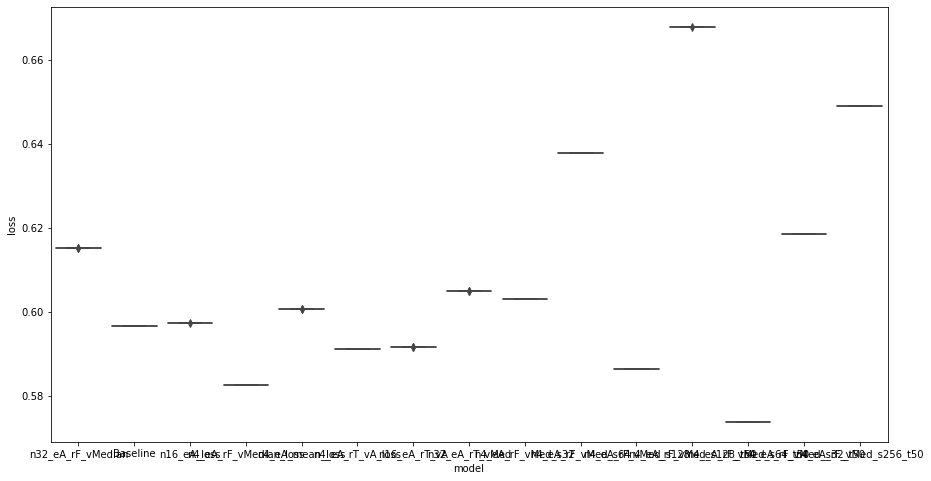

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))

sns.boxplot(data=df, x="model", y="loss")

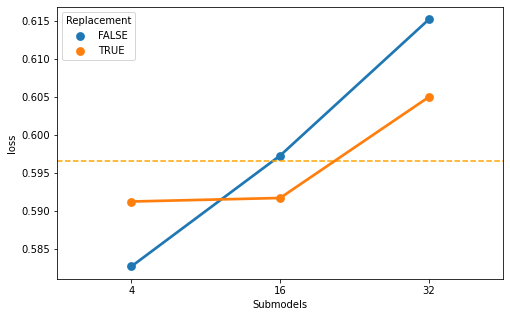

In [21]:
df1 = df.query('Sessions == 256 and Trials == 200 and Voting == "median" and Ensemble == "average" ')
#or model == "Baseline

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))

baseline_acc = df.query('model == "Baseline"').loss.mean()        
ax.axhline(baseline_acc, ls='--', color="orange")

sns.pointplot(
        data=df1, 
        x="Submodels", 
        y="loss", 
        hue="Replacement",
        errorbar="sd",
        )

plt.show()

# facet by vote and average

In [16]:
df.query('model == "Baseline"').loss.mean()

0.5965887129999999

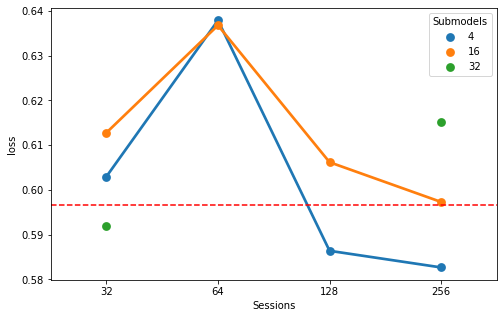

In [37]:
# 4 submodels, replacement false

df1 = df.query('Replacement == "FALSE" and Trials == 200 and Voting == "median" and Ensemble == "average"')
# and submodels == 4

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))

ax.axhline(baseline_acc, ls='--', color="red")

sns.pointplot(
        data=df1, 
        x="Sessions", 
        y="loss", 
        hue="Submodels",
        #errorbar="sd",
        )
        
plt.show()


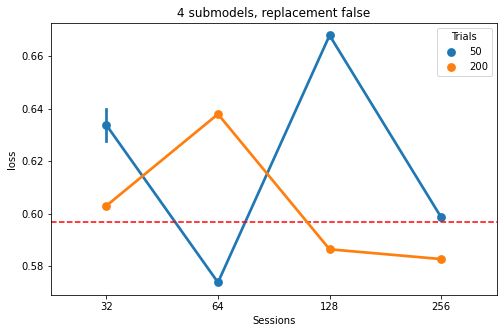

In [26]:
df1 = df.query('Replacement == "FALSE" and Voting == "median" and Ensemble == "average" and Submodels == 4')
# and submodels == 4

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))

ax.axhline(baseline_acc, ls='--', color="red")

sns.pointplot(
        data=df1, 
        x="Sessions", 
        y="loss", 
        hue="Trials",
        errorbar="sd",
        )

#fig.suptitle

plt.title("4 submodels, replacement false")        
plt.show()

In [ ]:
df1 = df.query('Sessions == 256 and Trials == 200 and Submodels == 4 and Ensemble == "average" or model == "Baseline"')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))

sns.pointplot(
        data=df1, 
        x="Submodels", 
        y="loss", 
        hue="Replacement",
        errorbar="sd",
        )
        
plt.show()